# Playwright Python API
This is the basic code for the article [Playwright introduction: A web scraping tools in practice](https://www.forloop.ai/blog/playwright).

In [4]:
# Install Playwright with the following commands.
#!pip3 install playwright
#!playwright install

In [15]:
import asyncio

from playwright.sync_api import sync_playwright
from playwright.async_api import async_playwright

### Variables

In [9]:
url = "https://www.forloop.ai/blog"

### Basics
You need run Playwright in Jupyter notebooks by making use of Playwright's async API. This is required because Jupyter notebooks use an asyncio event loop and you need to use Playwright's async API as well.

In [12]:
# Open webpage
pw = await async_playwright().start()
browser = await pw.chromium.launch(headless = False)
page = await browser.new_page()

await page.goto(url)

<Response url='https://www.forloop.ai/blog' request=<Request url='https://www.forloop.ai/blog' method='GET'>>

In [16]:
# Open the 1st article.
async def run(playwright):
    browser = await playwright.chromium.launch(headless=False)  # Set headless to False to see the browser in action
    context = await browser.new_context()

    # Open a new page
    page = await context.new_page()

    # Navigate to your website
    await page.goto(url)

    # Use the CSS selector to find the link to the first article and click it
    # In this case, the CSS selector is 'a.cms-item-link' which selects <a> elements with the class 'cms-item-link'
    await page.click('a.cms-item-link')

    # Wait a bit for the article page to load
    await asyncio.sleep(5)  # waits for 5 seconds

    # Close the browser
    await browser.close()

# Run the function
async with async_playwright() as playwright:
    await run(playwright)

### Extract all articles

In [17]:
async def run(playwright):
    browser = await playwright.chromium.launch()
    context = await browser.new_context()

    # Open a new page
    page = await context.new_page()

    # Navigate to the forloop.ai blog page
    await page.goto(url)

    # Find all articles
    articles = await page.query_selector_all('div.article-item')

    # Extract titles, tags, and dates
    for item in articles:
        title_element = await item.query_selector('h4')
        title = await title_element.inner_text()

        tag_element = await item.query_selector('div.text-white')
        tag = await tag_element.inner_text()

        date_element = await item.query_selector('div.blog-post-date')
        date = await date_element.inner_text()

        print(f'Title: {title}\nTag: {tag}\nDate: {date}\n---')

    # Close the browser
    await browser.close()

# Run the function
async with async_playwright() as playwright:
    await run(playwright)


Title: Selenium introduction: A web scraping tools in practice
Tag: 
Date: July 19, 2023
---
Title: Scrapy introduction: A web scraping tools in practice
Tag: Tutorial
Date: July 7, 2023
---
Title: Puppeteer Python API introduction: A web scraping tools in practice
Tag: Tutorial
Date: June 16, 2023
---
Title: Beautiful Soup introduction: A web scraping tools in practice
Tag: Tutorial
Date: June 2, 2023
---
Title: This is the Data: A Mandalorian Guide to Web Scraping Best Practices
Tag: Tutorial
Date: May 31, 2023
---
Title: Real Estate Crowdfunding platform leads generation strategies.
Tag: Business
Date: May 25, 2023
---
Title: Navigating Regulatory Challenges in Real Estate Crowdfunding
Tag: Business
Date: May 25, 2023
---
Title: The Role of AI in Real Estate Crowdfunding
Tag: Business
Date: May 3, 2023
---
Title: How to Start Investing as a Non-Accredited Investors in Real Estate Crowdfunding Platforms
Tag: Business
Date: April 26, 2023
---
Title: The Future of Real Estate Crowdfund

### Tips & Tricks

**Taking Screenshots or Videos of Web Interactions**

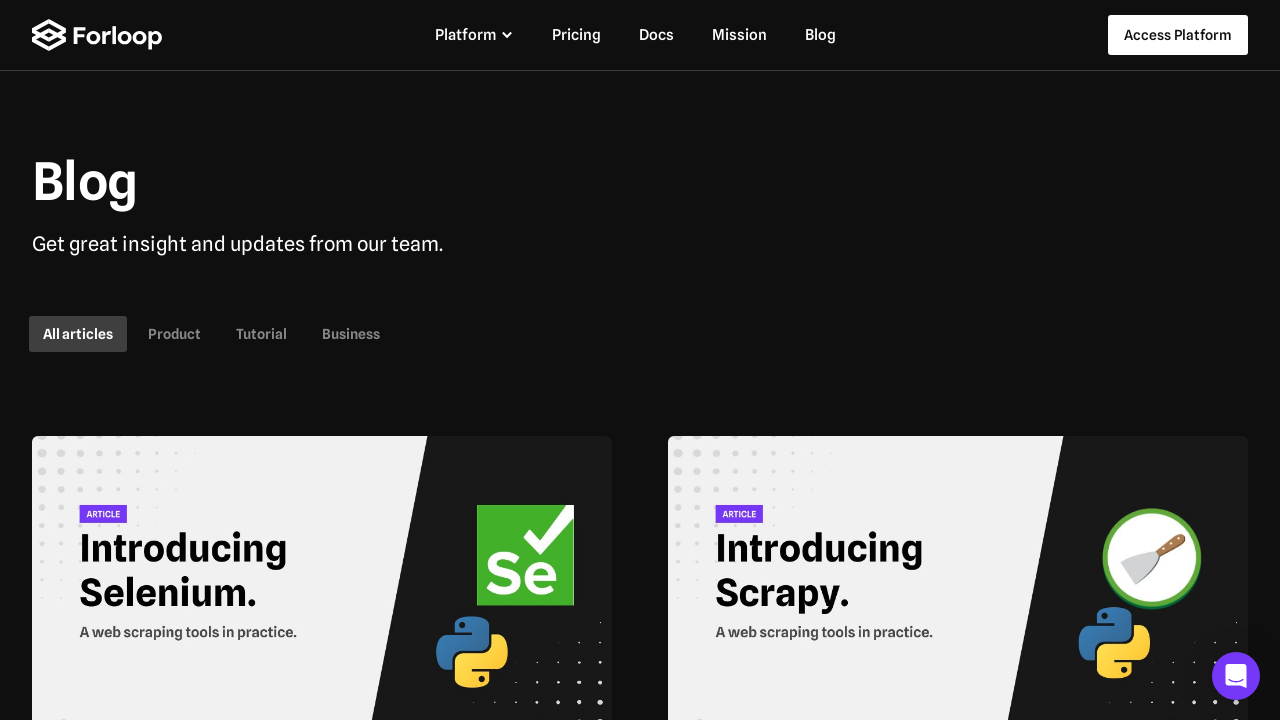

In [40]:
import asyncio
from playwright.async_api import async_playwright
from IPython.display import Image
from IPython.core.display import HTML 


async def run(playwright):
    browser = await playwright.chromium.launch()
    page = await browser.new_page()
    await page.goto(url)
    await page.wait_for_load_state('networkidle') 
    await page.screenshot(path='data/screenshot.png')
    await browser.close()

async with async_playwright() as playwright:
    await run(playwright)


Image("data/screenshot.png")

**Emulating Different Geographical Locations:**

In [50]:
import asyncio
from playwright.async_api import async_playwright


async def run(playwright):
    browser = await playwright.chromium.launch(headless=False)
    context = await browser.new_context(
        geolocation={"longitude": -74.1, "latitude": 40.7}, permissions=['geolocation']
    )
    page = await context.new_page()
    await page.goto('https://browserleaks.com/geo')
    await asyncio.sleep(5)  # Wait for a few seconds to check the results on the page
    print(f"Current URL: {page.url}")
    #await browser.close()

async with async_playwright() as playwright:
    await run(playwright)

Current URL: https://browserleaks.com/geo


**Handling Different Browser Contexts**

In [43]:
import asyncio
from playwright.async_api import async_playwright


async def run(playwright):
    browser = await playwright.chromium.launch()
    # Create a new context
    context = await browser.new_context()
    # Open a new page within this context
    page = await context.new_page()
    await page.goto(url)
    await browser.close()

async with async_playwright() as playwright:
    await run(playwright)